In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [10]:
distributed_systems = ['cassandra', 'hdfs']

In [5]:
df = pd.read_csv('./data.csv')
df = df.set_index('nodes')

In [6]:
df.head()

,cassandra,hdfs
nodes,,
10,10,26
20,34,46
30,54,66
40,74,89
50,96,109


In [7]:
df.index

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64', name='nodes')

Text(0, 0.5, 'Memory (MB)')

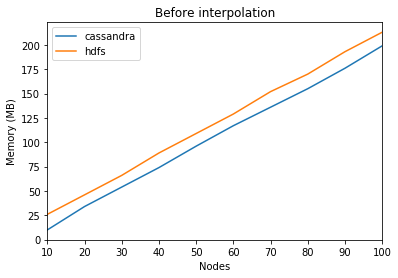

In [8]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

In [11]:
# f = interp1d(df.index, df['memory'], kind='cubic')
f = []
for system in distributed_systems:
    f.append(interp1d(df.index, df[system], kind='cubic'))

In [16]:
df_int = pd.DataFrame()
new_index = np.arange(10, 110, 10)
# df_int['memory'] = f(new_index)

for i in range(len(distributed_systems)):
    df_int[distributed_systems[i]] = f[i](new_index) 
    
df_int.index = new_index


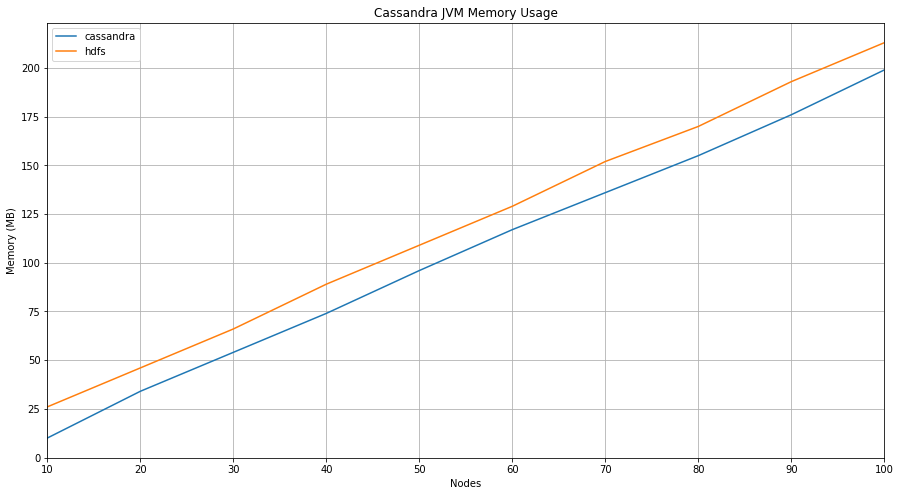

In [18]:
ax2 = df_int.plot.line(figsize=(15,8), grid=True)
ax2.set_title('Cassandra JVM Memory Usage')
ax2.set_xlabel("Nodes")
ax2.set_ylabel("Memory (MB)")
plt.savefig('plot.png')